# Statistical walks using uniform distributions
#### Author: Gabriel B.
___

Basic equation for extrapolating from a given value [1]
$$ 
\begin{equation} 
p(x)\sim N(x_0, (t-t_0)\sigma_{xx}^2) 
\tag{2.1}
\end{equation}
$$

To generate a random walk using 2.1, pick an initial value for $x_0$ and then use it to sample from the normal distribution function $p(x)$.
This will be used in a sequence to generate points $x_0, x_1, x_2, x_n$ 
$$
x_0 = some\space value\newline
x_1 = p(x_0)\newline
x_2 = p(x_1)\newline
...\newline
x_{n} = p(x_{n-1})\newline
$$
> [1] Sec. 2.3

In [9]:
# Implementation of (2.1)
import random
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=42)

init_value = 90
num_samples = 250
start_time = 0.0
end_time = 24.0  # hours
sigma_const = .5
# sigma = np.sqrt((end_time-start_time)*sigma_const**2)
sigma = np.sqrt(sigma_const)
# samples = [rng.normal(init_value, sigma)
#            for x in range(0, num_samples)]
samples = [init_value]
for _ in range(1, num_samples):
    next_value = rng.normal(samples[-1], sigma)
    samples.append(next_value)

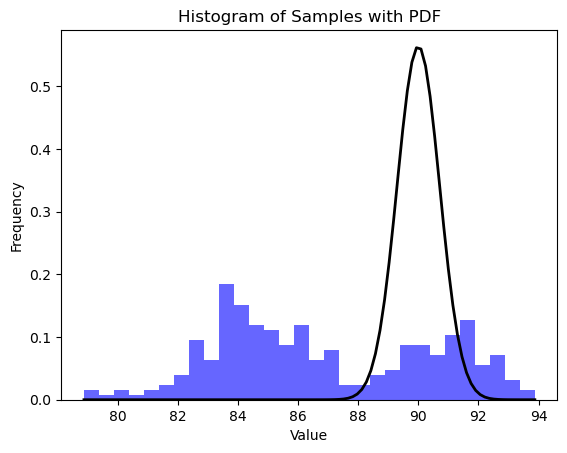

In [11]:
# Plot the histogram of the samples
plt.hist(samples, bins=30, density=True, alpha=0.6, color='b')

# Plot the probability density function (PDF) of the normal distribution
x = np.linspace(min(samples), max(samples), 100)
pdf = (1 / (np.sqrt(2 * np.pi * sigma**2))) * \
    np.exp(-0.5 * ((x - init_value)**2 / sigma**2))
plt.plot(x, pdf, 'k', linewidth=2)

plt.title('Histogram of Samples with PDF')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

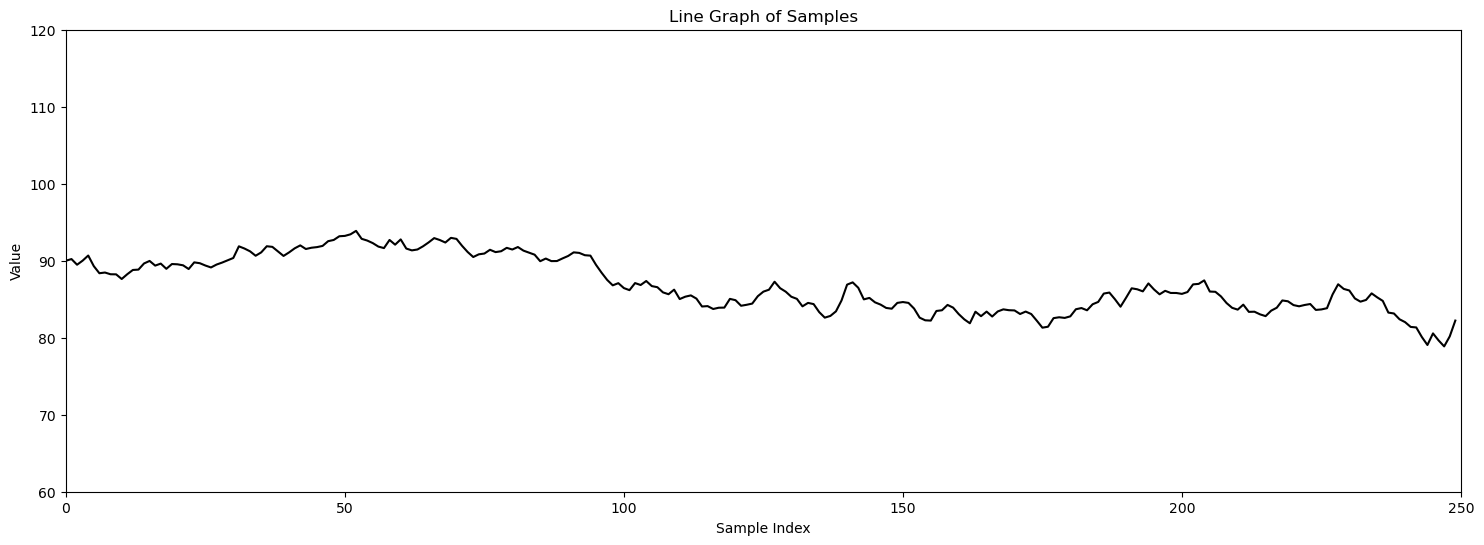

In [12]:
# Generate a line graph of the samples
plt.figure(figsize=(18, 6))
x_values = np.arange(0., 0. + num_samples)
plt.plot(samples, linestyle='-', marker='', color='black')
plt.title('Line Graph of Samples')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.ylim(60, 120)
plt.xlim(0, 250)
plt.show()

___

### Using Interpolation: Walking towards a point

The provided equation [1] is this:
$$
% \newcommand{\fuckshit}{(t-t_0)\sigma_{xx}^2}
% \newcommand{\shitfuck}{(t_n-t)\sigma_{xx}^2}
\renewcommand{\fuckshit}{(t-t_0)\sigma_{xx}^2}
\renewcommand{\shitfuck}{(t_n-t)\sigma_{xx}^2}
\begin{equation} \tag{2.2}
p(x)\sim N\left(\frac{\frac{x_0}{\fuckshit} + \frac{x_n}{\shitfuck}}{\frac{1}{\fuckshit}+\frac{1}{\shitfuck}}, \left(1\div(\frac{1}{\fuckshit}+\frac{1}{\shitfuck})\right)\right)
\end{equation}
$$

<!-- Which simplifies to this:
$$ 
\renewcommand{\fuckshit}{(t-t_0)\sigma_{xx}^2}
\begin{equation} \tag{2.2.1}
p(x)\sim N\left(\frac{x_0+x_n}{2}, \frac{(t-t_0)\sigma_{xx}^2}{2}\right)
\end{equation}
$$ -->

<!-- This is basically the same as Equation 2.1 but with a term which will let us interpolate between values. -->

## **Sources**

[1] John Manslow. 2019. Creating the Past, Present, and Future with Random Walks. In Game AI Pro 3. CRC Press. Retrieved August 10, 2024 from http://www.gameaipro.com/GameAIPro3/GameAIPro3_Chapter02_Creating_the_Past_Present_and_Future_with_Random_Walks.pdf